#  Baseline Model Tpot으로 진행 

# average 이용한 calibration

In [15]:
import sys
sys.path.append('../') 

In [16]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
tpot = True
trial_name = 'tpot_avg/'
dataset = pd.read_csv('../data/avg_images_avg.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP1 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [18]:
SP1.display_dataset()

,R,G,B,Thickness
0,11.6948,10.9112,8.1678,48.266667
1,16.3678,15.7481,17.2156,47.966667
2,10.6743,14.8974,17.9923,48.166667
3,16.4017,16.4446,18.6127,48.600000
4,9.5079,8.0496,12.7035,59.533333


In [19]:
SP1.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -48.94974251307687

Generation 2 - Current best internal CV score: -48.94974251307687

Generation 3 - Current best internal CV score: -48.94974251307687

Generation 4 - Current best internal CV score: -48.94974251307687

Generation 5 - Current best internal CV score: -48.94974251307687

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=5, p=2, weights=distance)
R2       0.869826
RMSE     8.850252
MSE     78.326957
MAE      5.204855
MAPE     5.432885
Name: tpot, dtype: float64


In [20]:
SP1.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.86983,8.85025,78.32696,5.20485,5.43288


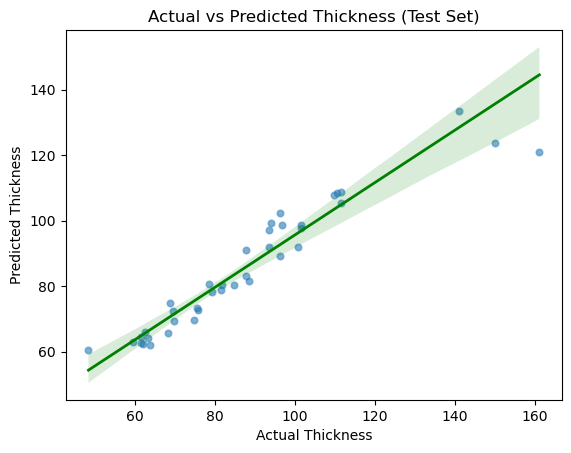

In [21]:
best_model, y_pred, test_pred = SP1.summarize(metric='RMSE')

# 이전에 진행한 방법론 calibration

In [22]:
trial_name = 'tpot_ky/'
dataset = pd.read_csv('../data/avg_images_ky.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = None
test_size = 0.3
random_state = 42

SP2 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    tpot=tpot, except_model = Except_models, test_size=test_size, random_state=random_state)

In [23]:
SP2.display_dataset()

,R,G,B,Thickness
0,11.694800,10.911200,8.167800,48.266667
1,10.786424,11.797264,9.764301,47.966667
2,13.372254,12.260120,8.377510,48.166667
3,9.727850,9.857869,6.836201,48.600000
4,4.889363,2.641330,1.296578,59.533333


In [24]:
SP2.fit()

Version 0.12.0 of tpot is outdated. Version 0.12.1 was released Tuesday August 15, 2023.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -53.23384797378168

Generation 2 - Current best internal CV score: -53.23384797378168

Generation 3 - Current best internal CV score: -53.23384797378168

Generation 4 - Current best internal CV score: -53.23384797378168

Generation 5 - Current best internal CV score: -44.37412068398536

Best pipeline: KNeighborsRegressor(input_matrix, n_neighbors=3, p=1, weights=distance)
R2       0.904846
RMSE     7.566739
MSE     57.255533
MAE      4.825972
MAPE     4.804920
Name: tpot, dtype: float64


In [25]:
SP2.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
tpot,0.90485,7.56674,57.25553,4.82597,4.80492


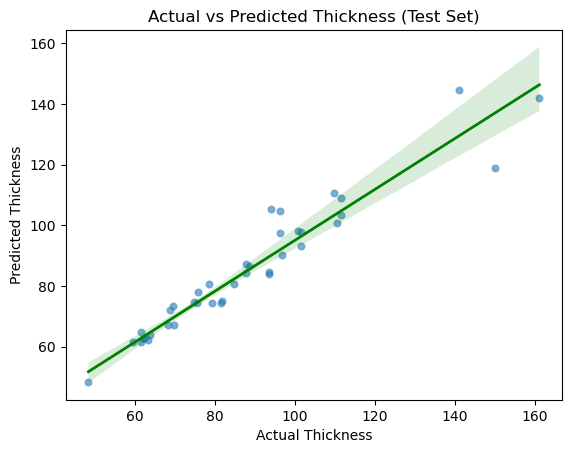

In [26]:
best_model, y_pred, test_pred = SP2.summarize(metric='RMSE')

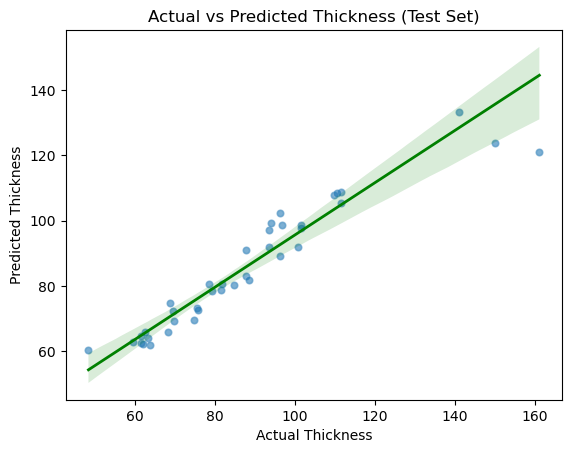

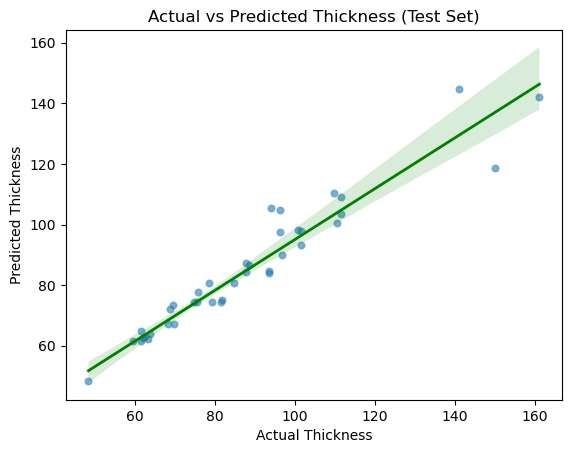

In [27]:
sp1_model, sp1_y_pred, sp1_test_pred = SP1.summarize(metric='RMSE')
sp2_model, sp2_y_pred, sp2_test_pred = SP2.summarize(metric='RMSE')

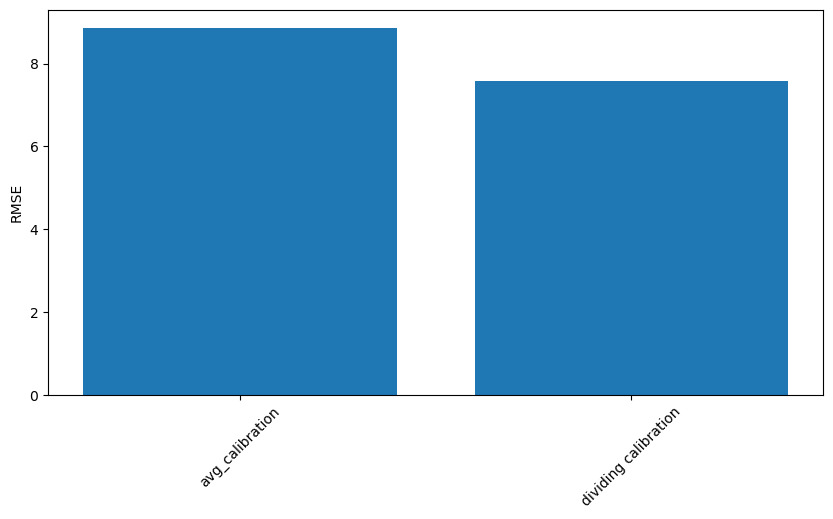

,Methods,RMSE
1,dividing calibration,7.566739
0,avg_calibration,8.850252


In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Compare All Methods

methods = ['avg_calibration','dividing calibration']

y_preds = [sp1_y_pred, sp2_y_pred]

#calculate RMSE
y_test = SP1.y_test

rmse = []
for y_pred in y_preds:
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
#plot
plt.figure(figsize=(10,5))
plt.bar(methods, rmse)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

# Dataframe
RMSE_comparing = pd.DataFrame({'Methods':methods, 'RMSE':rmse})
display(RMSE_comparing.sort_values(by='RMSE'))